In [1]:
# Just to know last time this was run:
import time
print time.ctime()

Tue May 31 17:33:43 2016


# J Using PyMySQL to access MySQL databases

This package contains a pure-Python MySQL client library. In this sense, it does not need to have access to mysql header or library, which is the case for the mysqldb package.
The goal of PyMySQL is to be a drop-in replacement for MySQLdb and work on CPython, PyPy, IronPython and Jython.

It is installed with "pip install pymysql"

We first import the usual libraries

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/home/morisset/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This is the import of the library used to connect to MySQl database

In [3]:
import pymysql

First you need to connect to a database. In our example, we will use the 3MdB database, which needs a password. https://sites.google.com/site/mexicanmillionmodels/

### Connect to the database

In [5]:
user_password = '***' # ask me for the password :-)

In [6]:
# We create a connector to the database
connector = pymysql.connect(host='132.248.1.102', port=3306, user='OVN_user', passwd=user_password, db='3MdB')

### Use a cursor to send query and receive results

In [7]:
# The cursor is used to send and receive the quesries to the databse
cur = connector.cursor()

In [8]:
# Send the query to be executed. It returns the number of lines of the result
cur.execute('select * from `lines` limit 15')

15

In [9]:
# get a description of the columns of the query results
cur.description

((u'Nl', 8, None, 20, 20, 0, False),
 (u'label', 253, None, 15, 15, 0, True),
 (u'id', 253, None, 20, 20, 0, True),
 (u'lambda', 5, None, 22, 22, 31, True),
 (u'name', 253, None, 40, 40, 0, False),
 (u'used', 3, None, 2, 2, 0, True))

In [10]:
# fech all the resulting data into a variable
lines = cur.fetchall()

In [11]:
# close the cursor once used
cur.close()

In [12]:
# the result is in a form of tuple of tuples
print lines

((1, 'BAC___3646A', 'Bac ', 3646.0, 'BalmHead', 1), (2, 'COUT__3646A', 'cout', 3646.0, 'OutwardBalmPeak', 1), (3, 'CREF__3646A', 'cref', 3646.0, 'ReflectedBalmPeak', 1), (4, 'H__1__4861A', 'H  1', 4861.0, 'H I 4861', 1), (5, 'TOTL__4861A', 'TOTL', 4861.0, 'H I 4861', 1), (6, 'H__1__6563A', 'H  1', 6563.0, 'H I 6563', 1), (7, 'H__1__4340A', 'H  1', 4340.0, 'H I 4340', 1), (8, 'H__1__4102A', 'H  1', 4102.0, 'H I 4102', 1), (9, 'H__1__3970A', 'H  1', 3970.0, 'H I 3970', 1), (10, 'H__1__3835A', 'H  1', 3835.0, 'H I 3835', 1), (11, 'H__1__1216A', 'H  1', 1216.0, 'H I 1216', 1), (12, 'H__1_4051M', 'H  1', 4.051, 'H I 4.051m', 1), (13, 'H__1_2625M', 'H  1', 2.625, 'H I 2.625m', 1), (14, 'H__1_7458M', 'H  1', 7.458, 'H I 7.458m', 1), (15, 'HE_1__5876A', 'He 1', 5876.0, 'He I 5876', 1))


In [13]:
# Each element of the first level tuple is a tuple corresponding to a row of the query results
print len(lines)
print lines[0]

15
(1, 'BAC___3646A', 'Bac ', 3646.0, 'BalmHead', 1)


### Using a cursor that returns a dictionary

In [14]:
cur_dic = connector.cursor(pymysql.cursors.DictCursor)

In [15]:
cur_dic.execute('select * from `lines` limit 15')

15

In [16]:
lines_dic = cur_dic.fetchall()

In [17]:
print lines_dic

[{u'used': 1, u'Nl': 1, u'name': 'BalmHead', u'label': 'BAC___3646A', u'id': 'Bac ', u'lambda': 3646.0}, {u'used': 1, u'Nl': 2, u'name': 'OutwardBalmPeak', u'label': 'COUT__3646A', u'id': 'cout', u'lambda': 3646.0}, {u'used': 1, u'Nl': 3, u'name': 'ReflectedBalmPeak', u'label': 'CREF__3646A', u'id': 'cref', u'lambda': 3646.0}, {u'used': 1, u'Nl': 4, u'name': 'H I 4861', u'label': 'H__1__4861A', u'id': 'H  1', u'lambda': 4861.0}, {u'used': 1, u'Nl': 5, u'name': 'H I 4861', u'label': 'TOTL__4861A', u'id': 'TOTL', u'lambda': 4861.0}, {u'used': 1, u'Nl': 6, u'name': 'H I 6563', u'label': 'H__1__6563A', u'id': 'H  1', u'lambda': 6563.0}, {u'used': 1, u'Nl': 7, u'name': 'H I 4340', u'label': 'H__1__4340A', u'id': 'H  1', u'lambda': 4340.0}, {u'used': 1, u'Nl': 8, u'name': 'H I 4102', u'label': 'H__1__4102A', u'id': 'H  1', u'lambda': 4102.0}, {u'used': 1, u'Nl': 9, u'name': 'H I 3970', u'label': 'H__1__3970A', u'id': 'H  1', u'lambda': 3970.0}, {u'used': 1, u'Nl': 10, u'name': 'H I 3835', u'

In [18]:
# Each element of the table is a dictionary corresponding to a row od the query results
print lines_dic[0]

{u'used': 1, u'Nl': 1, u'name': 'BalmHead', u'label': 'BAC___3646A', u'id': 'Bac ', u'lambda': 3646.0}


In [19]:
# One can easily create a new dictionary than hold the data in columns, better for plotting.
new_dic = {k:np.array([d[k] for d in lines_dic]) for k in lines_dic[0].keys()}

In [20]:
# The names of the columns are the names use in the database
new_dic['lambda']

array([  3.64600000e+03,   3.64600000e+03,   3.64600000e+03,
         4.86100000e+03,   4.86100000e+03,   6.56300000e+03,
         4.34000000e+03,   4.10200000e+03,   3.97000000e+03,
         3.83500000e+03,   1.21600000e+03,   4.05100000e+00,
         2.62500000e+00,   7.45800000e+00,   5.87600000e+03])

In [21]:
# One can also transform the results into a numpy recarray.
# First step: create a table from the dictionnary
lines_tab = [e.values() for e in lines_dic]
lines_tab

[[1, 1, 'BalmHead', 'BAC___3646A', 'Bac ', 3646.0],
 [1, 2, 'OutwardBalmPeak', 'COUT__3646A', 'cout', 3646.0],
 [1, 3, 'ReflectedBalmPeak', 'CREF__3646A', 'cref', 3646.0],
 [1, 4, 'H I 4861', 'H__1__4861A', 'H  1', 4861.0],
 [1, 5, 'H I 4861', 'TOTL__4861A', 'TOTL', 4861.0],
 [1, 6, 'H I 6563', 'H__1__6563A', 'H  1', 6563.0],
 [1, 7, 'H I 4340', 'H__1__4340A', 'H  1', 4340.0],
 [1, 8, 'H I 4102', 'H__1__4102A', 'H  1', 4102.0],
 [1, 9, 'H I 3970', 'H__1__3970A', 'H  1', 3970.0],
 [1, 10, 'H I 3835', 'H__1__3835A', 'H  1', 3835.0],
 [1, 11, 'H I 1216', 'H__1__1216A', 'H  1', 1216.0],
 [1, 12, 'H I 4.051m', 'H__1_4051M', 'H  1', 4.051],
 [1, 13, 'H I 2.625m', 'H__1_2625M', 'H  1', 2.625],
 [1, 14, 'H I 7.458m', 'H__1_7458M', 'H  1', 7.458],
 [1, 15, 'He I 5876', 'HE_1__5876A', 'He 1', 5876.0]]

In [22]:
# Second step: transform the table into a numpy recarray, using the names from the dictionnary
res = np.rec.fromrecords(lines_tab, names = lines_dic[0].keys())

In [23]:
res

rec.array([(1, 1, 'BalmHead', 'BAC___3646A', 'Bac ', 3646.0),
 (1, 2, 'OutwardBalmPeak', 'COUT__3646A', 'cout', 3646.0),
 (1, 3, 'ReflectedBalmPeak', 'CREF__3646A', 'cref', 3646.0),
 (1, 4, 'H I 4861', 'H__1__4861A', 'H  1', 4861.0),
 (1, 5, 'H I 4861', 'TOTL__4861A', 'TOTL', 4861.0),
 (1, 6, 'H I 6563', 'H__1__6563A', 'H  1', 6563.0),
 (1, 7, 'H I 4340', 'H__1__4340A', 'H  1', 4340.0),
 (1, 8, 'H I 4102', 'H__1__4102A', 'H  1', 4102.0),
 (1, 9, 'H I 3970', 'H__1__3970A', 'H  1', 3970.0),
 (1, 10, 'H I 3835', 'H__1__3835A', 'H  1', 3835.0),
 (1, 11, 'H I 1216', 'H__1__1216A', 'H  1', 1216.0),
 (1, 12, 'H I 4.051m', 'H__1_4051M', 'H  1', 4.051),
 (1, 13, 'H I 2.625m', 'H__1_2625M', 'H  1', 2.625),
 (1, 14, 'H I 7.458m', 'H__1_7458M', 'H  1', 7.458),
 (1, 15, 'He I 5876', 'HE_1__5876A', 'He 1', 5876.0)], 
          dtype=[(u'used', '<i8'), (u'Nl', '<i8'), (u'name', 'S17'), (u'label', 'S11'), (u'id', 'S4'), (u'lambda', '<f8')])

In [24]:
res['lambda']

array([  3.64600000e+03,   3.64600000e+03,   3.64600000e+03,
         4.86100000e+03,   4.86100000e+03,   6.56300000e+03,
         4.34000000e+03,   4.10200000e+03,   3.97000000e+03,
         3.83500000e+03,   1.21600000e+03,   4.05100000e+00,
         2.62500000e+00,   7.45800000e+00,   5.87600000e+03])

### Example of plotting the result of a query

In [25]:
# Send the query
N = cur_dic.execute('select O__3__5007A, N__2__6584A, H__1__6563A, oxygen from tab where ref = "HII_CHIm"')

In [26]:
print N

7854


In [27]:
# obtain the results as a dictionnary
res = cur_dic.fetchall()

In [28]:
# transform the disctionary into a recarray
data = np.rec.fromrecords([e.values() for e in res], names = res[0].keys())

In [29]:
# check the data
data

rec.array([(1.13306243836e+58, 8.465943086e+58, -3.1, 3.15741653467e+58),
 (3.42011987292e+59, 3.82678097448e+59, -4.7, 1.96658128904e+58),
 (1.9919317079e+55, 2.95364632532e+58, -2.9, 8.79993595982e+57), ...,
 (1.75269190656e+60, 5.79356475056e+59, -3.7, 5.08981089096e+58),
 (1.37202884837e+60, 5.15976659165e+59, -4.1, 3.20261785304e+57),
 (1.52244147812e+60, 5.27404255136e+59, -4.0, 3.89222406128e+58)], 
          dtype=[(u'O__3__5007A', '<f8'), (u'H__1__6563A', '<f8'), (u'oxygen', '<f8'), (u'N__2__6584A', '<f8')])

In [30]:
data['O__3__5007A']

array([  1.13306244e+58,   3.42011987e+59,   1.99193171e+55, ...,
         1.75269191e+60,   1.37202885e+60,   1.52244148e+60])

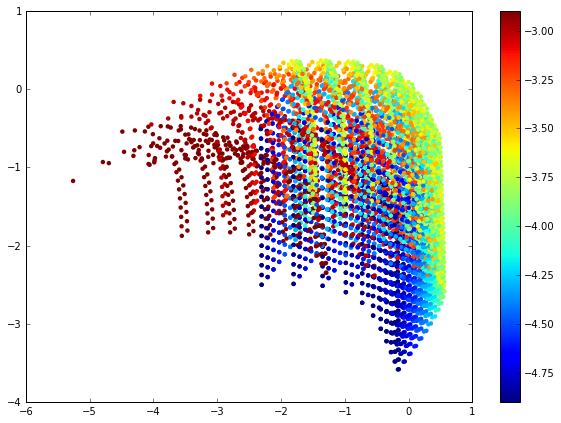

In [31]:
# Plot the results, using a column as color code
fig, ax = plt.subplots(figsize=(10,7))
scat = ax.scatter(np.log10(data['O__3__5007A'] / data['H__1__6563A']), np.log10(data['N__2__6584A'] / data['H__1__6563A']), 
            c=data['oxygen'], edgecolor='none')
fig.colorbar(scat)

In [32]:
# Disconnect cursor and connector
cur_dic.close()
connector.close()

### Easier way using pyCloudy library

In [33]:
# Import pyCloudy
import pyCloudy as pc
# pyCloudy version must be > 0.8.43
print pc.__version__

0.8.59b2


In [35]:
pc.config.db_connector = 'PyMySQL'
# Define the parameters of the connection in a dictionnary
OVN_dic= {'host' : '132.248.1.102',
          'user_name' : 'OVN_user',
          'user_passwd' : '***', 
          'base_name' : '3MdB'}
# Instantiate an object that will deal with the database connections and queries
db = pc.MdB(OVN_dic)

In [36]:
res, N = db.exec_dB('select ref, count(*) from tab group by ref')
print res
print N

[{u'count(*)': 31500, u'ref': 'BOND'}, {u'count(*)': 85800, u'ref': 'CALIFA'}, {u'count(*)': 20793, u'ref': 'CALIFA_ah'}, {u'count(*)': 41327, u'ref': 'DIG_HR'}, {u'count(*)': 7854, u'ref': 'HII_CHIm'}, {u'count(*)': 542950, u'ref': 'PNe_2014'}, {u'count(*)': 45280, u'ref': 'PNe_2014_c13'}]
7


In [37]:
# Obtain the result of a select command directly as a recarray
data, N = db.select_dB(select_='O__3__5007A, N__2__6584A, H__1__6563A, oxygen', from_='tab', where_='ref="HII_CHIm"',
                    limit_=None, format_='rec')

In [38]:
# Check the data
data

rec.array([(1.13306243836e+58, 8.465943086e+58, -3.1, 3.15741653467e+58),
 (3.42011987292e+59, 3.82678097448e+59, -4.7, 1.96658128904e+58),
 (1.9919317079e+55, 2.95364632532e+58, -2.9, 8.79993595982e+57), ...,
 (1.75269190656e+60, 5.79356475056e+59, -3.7, 5.08981089096e+58),
 (1.37202884837e+60, 5.15976659165e+59, -4.1, 3.20261785304e+57),
 (1.52244147812e+60, 5.27404255136e+59, -4.0, 3.89222406128e+58)], 
          dtype=[(u'O__3__5007A', '<f8'), (u'H__1__6563A', '<f8'), (u'oxygen', '<f8'), (u'N__2__6584A', '<f8')])

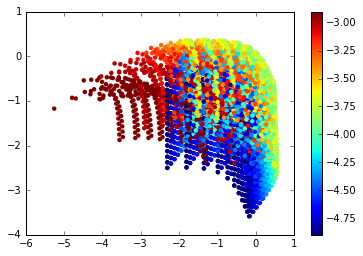

In [39]:
# Make the same plot
fig, ax = plt.subplots()
scat = ax.scatter(np.log10(data['O__3__5007A'] / data['H__1__6563A']), np.log10(data['N__2__6584A'] / data['H__1__6563A']), 
            c=data['oxygen'], edgecolor='none')
cb = fig.colorbar(scat)

In [40]:
# The same, using pandas to store the results.
# needs to have pandas installed : pip install --no-deps pandas
data, N = db.select_dB(select_='O__3__5007A, N__2__6584A, H__1__6563A, oxygen', from_='tab', where_='ref="HII_CHIm"',
                    limit_=None, format_='pandas')

In [41]:
print type(data)
data

<class 'pandas.core.frame.DataFrame'>


,O__3__5007A,N__2__6584A,H__1__6563A,oxygen
0,1.133062e+58,3.157417e+58,8.465943e+58,-3.1
1,3.420120e+59,1.966581e+58,3.826781e+59,-4.7
2,1.991932e+55,8.799936e+57,2.953646e+58,-2.9
3,1.094455e+59,1.517612e+57,7.586338e+58,-3.9
4,1.300403e+56,9.594305e+56,1.593603e+58,-3.0
5,4.547320e+59,6.234337e+56,2.780188e+59,-4.3
6,3.482729e+59,4.703550e+56,3.828982e+59,-4.7
7,4.364881e+58,1.791885e+58,7.633109e+58,-4.5
8,7.768910e+58,6.520140e+57,1.388706e+59,-3.2
9,6.521827e+59,3.655320e+58,2.850901e+59,-4.0


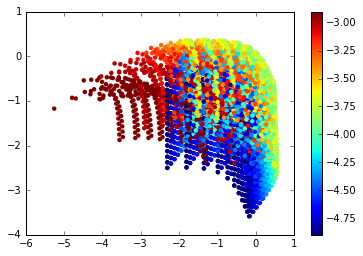

In [42]:
# Make the same plot
fig, ax = plt.subplots()
scat = ax.scatter(np.log10(data['O__3__5007A'] / data['H__1__6563A']), np.log10(data['N__2__6584A'] / data['H__1__6563A']), 
            c=data['oxygen'], edgecolor='none')
cb = fig.colorbar(scat)

In [43]:
db.close_dB()

### Using pyCloudy to save the result in a file

In [44]:
from pyCloudy.db.MdB import MdB_subproc

In [45]:
db = MdB_subproc(OVN_dic)

In [46]:
# The queries used here are send by calling the linux mysql and sending the output to a file.
# Notice the outfile. 
db.select_dB(select_='O__3__5007A, N__2__6584A, H__1__6563A, oxygen', from_='tab', where_='ref="HII_CHIm"',
                    limit_=None, outfile='query_res.dat')
db.close_dB()

In [47]:
# The outfile contains the result of the query
!head query_res.dat

O__3__5007A	N__2__6584A	H__1__6563A	oxygen
1.13306243836e58	3.15741653467e58	8.465943086e58	-3.1
3.42011987292e59	1.96658128904e58	3.82678097448e59	-4.7
1.9919317079e55	8.79993595982e57	2.95364632532e58	-2.9
1.09445528168e59	1.51761218935e57	7.58633813601e58	-3.9
1.3004028118e56	9.59430498831e56	1.59360285671e58	-3
4.54731969943e59	6.23433665474e56	2.780187567e59	-4.3
3.48272851916e59	4.70354986736e56	3.82898210273e59	-4.7
4.36488135054e58	1.79188530745e58	7.63310885003e58	-4.5
7.76890989905e58	6.52013985859e57	1.38870636951e59	-3.2


In [48]:
data = np.genfromtxt('query_res.dat', names=True, dtype=None)

In [49]:
data

array([(1.13306243836e+58, 3.15741653467e+58, 8.465943086e+58, -3.1),
       (3.42011987292e+59, 1.96658128904e+58, 3.82678097448e+59, -4.7),
       (1.9919317079e+55, 8.79993595982e+57, 2.95364632532e+58, -2.9), ...,
       (1.75269190656e+60, 5.08981089096e+58, 5.79356475056e+59, -3.7),
       (1.37202884837e+60, 3.20261785304e+57, 5.15976659165e+59, -4.1),
       (1.52244147812e+60, 3.89222406128e+58, 5.27404255136e+59, -4.0)], 
      dtype=[('O__3__5007A', '<f8'), ('N__2__6584A', '<f8'), ('H__1__6563A', '<f8'), ('oxygen', '<f8')])

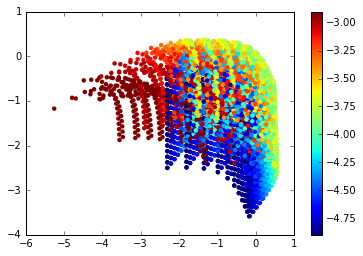

In [50]:
# Make the same plot
fig, ax = plt.subplots()
scat = ax.scatter(np.log10(data['O__3__5007A'] / data['H__1__6563A']), np.log10(data['N__2__6584A'] / data['H__1__6563A']), 
            c=data['oxygen'], edgecolor='none')
cb = fig.colorbar(scat)